In [1]:
import os
import argparse
import torch
import random
import numpy as np
from tqdm import tqdm
from torch.utils.data import random_split

from model.crnn import CRNN
from model.MyCrnn import MyCRNN
from dataset import DatasetImg
from utils.utils import *
from utils.StrLabelConverter import *
from trainer import *

c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pretrained = 'pretrain/MyCrnn/model_75.pth.tar'

In [3]:
device = ( "cuda" if torch.cuda.is_available() else "cpu")
print("---------------------------------------------------")
print(f"Using {device} device")
print("---------------------------------------------------")

with open(os.path.join('data/mychar.txt'), 'r', encoding='utf-8') as f:
    alphabet = f.read().rstrip()
# print(alphabet)
converter = StrLabelConverter(alphabet, ignore_case=False)
converter.numClass

---------------------------------------------------
Using cpu device
---------------------------------------------------


155

In [4]:
# --------------------- Create Model ---------------------------------
model = MyCRNN(converter.numClass, 125, 0.1).to(device)
# print(f"Model structure: {model}\n\n")
# for name, param in model.named_parameters():
#     print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

criterion = torch.nn.CTCLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epoch = 0
if pretrained:
    checkpoint_path = pretrained
    checkpoint = torch.load(checkpoint_path, map_location=torch.device(device))
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']

>>>> use MyCrnn-------------



In [5]:
from tester import Tester

tester = Tester(model, optimizer, converter)

Công nghệ neo và hì thuật phìn mề là màn hạ


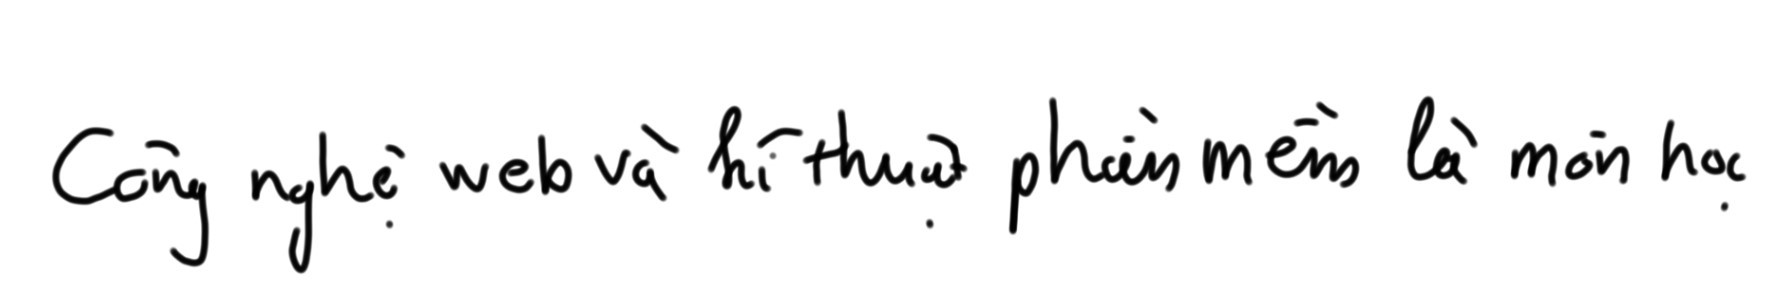

In [17]:
path = 'data/test/z5385735245897_5fe4592d884adf79a384639b30f438c7.jpg'
print(tester.predict(path))
Image.open(path)


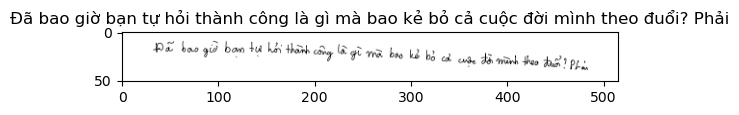

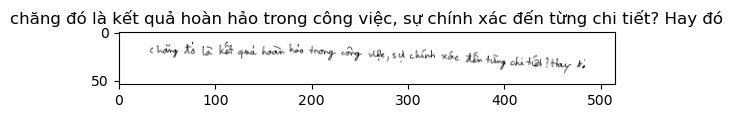

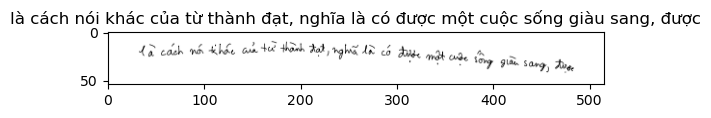

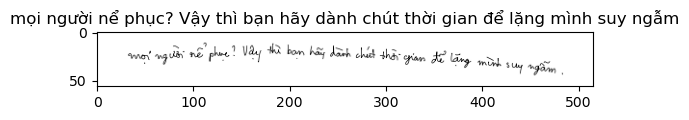

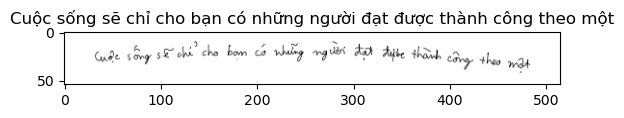

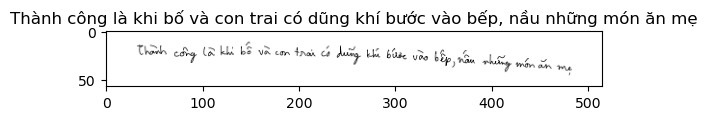

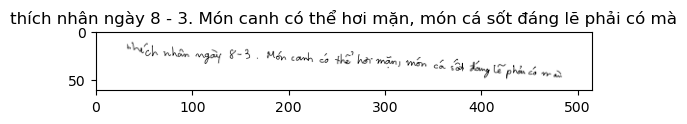

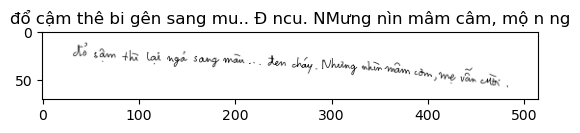

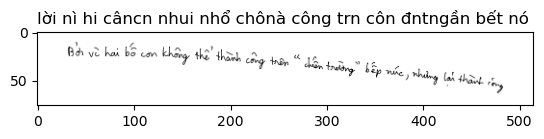

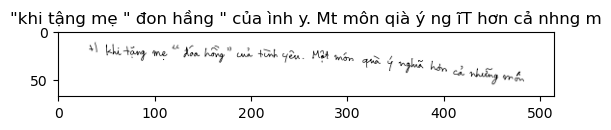

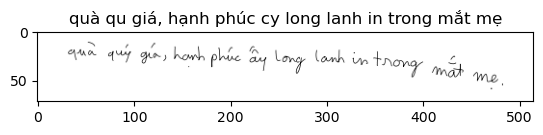

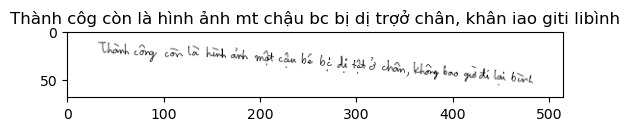

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

root = 'data/data1/img'
for i, path in enumerate(os.listdir(root)):
    imgpath = root + '/' + path
    img = Image.open(imgpath)
    plt.imshow(img)
    plt.title(tester.predict(imgpath))
    plt.show()
    if i > 10: break